In [2]:
import seaborn as sns

In [28]:
import pandas as pd

data = pd.read_csv('tv_shows.csv')

In [29]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [31]:
data.shape

(5611, 11)

In [43]:
data['Age'] = data['Age'].astype(str)

In [75]:
data['rating'] = data['Rotten Tomatoes'].apply(lambda x: int(x.replace('%', '')) if type(x) == str else x)
bins = [0, 25, 50, 75, 100]
data['rating'] = pd.cut(data['rating'], bins)
data['rating'] = data['rating'].astype(str)

data['rating'].value_counts(dropna=False)

nan              4600
(75.0, 100.0]     660
(50.0, 75.0]      212
(25.0, 50.0]      111
(0.0, 25.0]        28
Name: rating, dtype: int64

In [44]:
data['Age'].value_counts(dropna=False)

nan    2446
16+    1018
7+      848
18+     750
all     545
13+       4
Name: Age, dtype: int64

In [24]:
services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

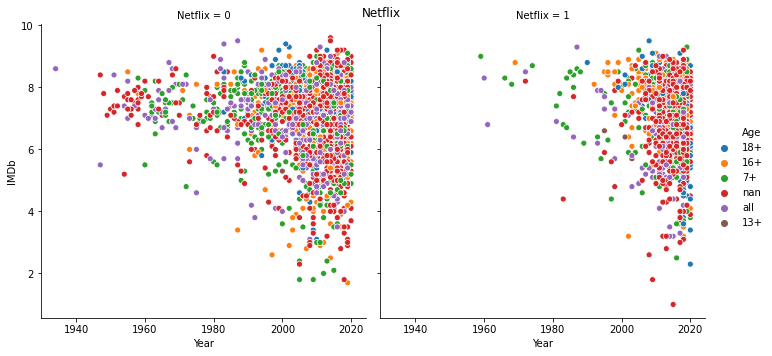

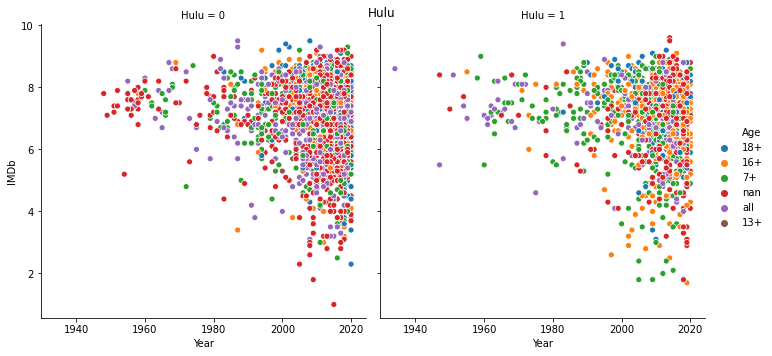

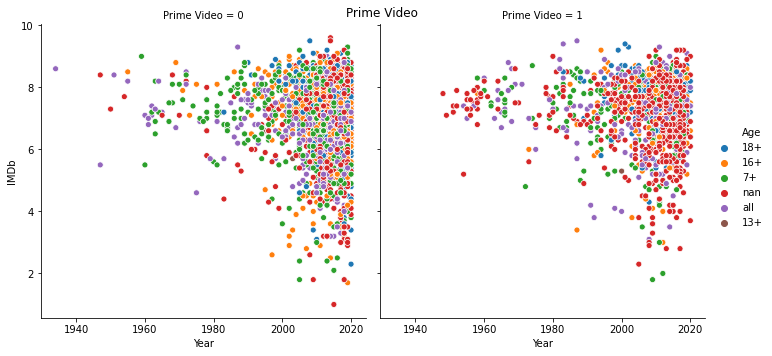

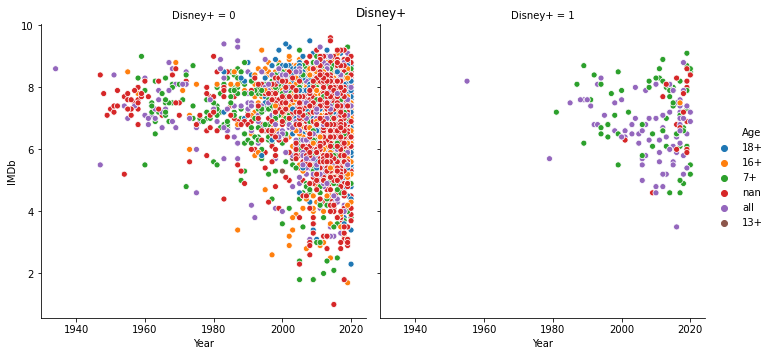

In [78]:
for service in services:
    sns.relplot(x="Year"
                , y="IMDb"
                , data=data
                , hue='Age'
                , col=service).fig.suptitle(f"{service}")